<a href="https://colab.research.google.com/github/Kremmydasalexandros/datastories_for_emme/blob/main/%CE%93%CE%A5%CE%9D%CE%91%CE%99%CE%9A%CE%9F%CE%9A%CE%A4%CE%9F%CE%9D%CE%99%CE%91_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd


In [3]:
pd.read_csv("/content/gdrive/MyDrive/GYNAIKOKTONIA.csv")

,type,source,title,text,categories,sentiment,impact,date,time,link
0,web,athina984.gr,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,76.8340,2024-06-28,22:38:01,https://athina984.gr/2024/06/28/omilia-koytsoy...
1,web,kathimerini.gr,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,99.5491,2024-06-28,22:37:53,https://www.kathimerini.gr/opinion/readers/563...
2,web,athlosnews.gr,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,84.6200,2024-06-28,22:33:37,https://athlosnews.gr/835282/poini-fylakisis-1...
3,web,youfly.com,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,96.5030,2024-06-28,22:32:29,https://youfly.com/tileorasi/to-proxenio-tis-i...
4,web,in.gr,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,99.8697,2024-06-28,22:32:09,https://www.in.gr/2024/06/28/world/ekloges-sto...
...,...,...,...,...,...,...,...,...,...,...
1448,web,coollife.gr,Σοφία Πολυζωγοπούλου – Η σύζυγος του Απόστολου...,NaN,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Negative,40.0000,2024-06-27,22:01:44,https://coollife.gr/2024/06/27/%cf%83%ce%bf%cf...
1449,web,karditsalive.net,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,95.9018,2024-06-27,22:01:39,https://www.karditsalive.net/karditsa/%CF%84%C...
1450,web,znews.gr,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,96.0721,2024-06-27,22:01:00,https://znews.gr/media/late-night-shows/fotein...
1451,web,enikos.gr,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,99.7695,2024-06-27,22:00:58,https://www.enikos.gr/society/fylakes-korydall...


In [4]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 15.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [6]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"


In [7]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:

emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [10]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
import spacy

In [12]:

nlp = spacy.load('el_core_news_sm')

In [13]:
full_articles_df = pd.read_csv("/content/gdrive/MyDrive/GYNAIKOKTONIA.csv")

In [14]:
full_articles_df

,type,source,title,text,categories,sentiment,impact,date,time,link
0,web,athina984.gr,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,76.8340,2024-06-28,22:38:01,https://athina984.gr/2024/06/28/omilia-koytsoy...
1,web,kathimerini.gr,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,99.5491,2024-06-28,22:37:53,https://www.kathimerini.gr/opinion/readers/563...
2,web,athlosnews.gr,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,84.6200,2024-06-28,22:33:37,https://athlosnews.gr/835282/poini-fylakisis-1...
3,web,youfly.com,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,96.5030,2024-06-28,22:32:29,https://youfly.com/tileorasi/to-proxenio-tis-i...
4,web,in.gr,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,99.8697,2024-06-28,22:32:09,https://www.in.gr/2024/06/28/world/ekloges-sto...
...,...,...,...,...,...,...,...,...,...,...
1448,web,coollife.gr,Σοφία Πολυζωγοπούλου – Η σύζυγος του Απόστολου...,NaN,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Negative,40.0000,2024-06-27,22:01:44,https://coollife.gr/2024/06/27/%cf%83%ce%bf%cf...
1449,web,karditsalive.net,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,95.9018,2024-06-27,22:01:39,https://www.karditsalive.net/karditsa/%CF%84%C...
1450,web,znews.gr,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,96.0721,2024-06-27,22:01:00,https://znews.gr/media/late-night-shows/fotein...
1451,web,enikos.gr,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,99.7695,2024-06-27,22:00:58,https://www.enikos.gr/society/fylakes-korydall...


In [15]:

len(full_articles_df)

1453

In [16]:
full_articles_df.head(1)

,type,source,title,text,categories,sentiment,impact,date,time,link
0,web,athina984.gr,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,76.834,2024-06-28,22:38:01,https://athina984.gr/2024/06/28/omilia-koytsoy...


In [17]:
df = full_articles_df[['date','text' ]]
short_df = df.rename(columns={'text': 'text'} )

In [18]:
df.tail()

,date,text
1448,2024-06-27,NaN
1449,2024-06-27,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1450,2024-06-27,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1451,2024-06-27,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε..."
1452,2024-06-27,Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...


In [19]:
short_df.dtypes

date    object
text    object
dtype: object

In [20]:
short_df['date'] = pd.to_datetime(short_df['date'], format='%Y-%m-%d') # Change the format string to match the date format in your data

In [21]:
short_df['date'] = pd.to_datetime(short_df['date'], format='%Y-%m-%d %H:%M')


In [22]:
short_df.dtypes

date    datetime64[ns]
text            object
dtype: object

In [23]:
short_df['text'] = short_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)


In [24]:
short_df.head()

,date,text
0,2024-06-28,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."
1,2024-06-28,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2,2024-06-28,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3,2024-06-28,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4,2024-06-28,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...


In [25]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [26]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [27]:
# Handle missing values in 'text' column before vectorization
short_df['text'] = short_df['text'].fillna('')  # Replace NaN with empty strings

matrix = vec.fit_transform(short_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
matrix = vec.fit_transform(short_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:

wordcount_df.shape

(1453, 13161)

In [30]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [33]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [34]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
1452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
wordcount_df[trust_words].tail(1)


,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
1452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
wordcount_df[trust_words].sum(axis=1)


0       67
1        9
2       20
3        1
4       34
        ..
1448     0
1449     4
1450     9
1451     7
1452     8
Length: 1453, dtype: int64

In [37]:
short_df.head(3)


,date,text
0,2024-06-28,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."
1,2024-06-28,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2,2024-06-28,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...


In [38]:
short_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [39]:
short_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2024-06-28,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",82,106,39,45,28,67,49,45,100,62
1,2024-06-28,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,0,17,6,0,3,9,5,0,7,2
2,2024-06-28,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,28,23,2,15,5,20,10,15,35,33
3,2024-06-28,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,4,5,1,3,5,1,3,5,5,5
4,2024-06-28,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,14,49,7,8,8,34,16,9,27,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,2024-06-27,,0,0,0,0,0,0,0,0,0,0
1449,2024-06-27,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,0,5,3,0,0,4,2,1,0,0
1450,2024-06-27,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,5,19,7,3,1,9,5,5,14,4
1451,2024-06-27,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",11,10,4,3,7,7,14,15,20,17


In [40]:
short_df.reset_index(inplace=True)
short_df.set_index('date', inplace=True)
short_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2024-06-28,0,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",82,106,39,45,28,67,49,45,100,62
2024-06-28,1,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,0,17,6,0,3,9,5,0,7,2
2024-06-28,2,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,28,23,2,15,5,20,10,15,35,33
2024-06-28,3,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,4,5,1,3,5,1,3,5,5,5
2024-06-28,4,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,14,49,7,8,8,34,16,9,27,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27,1448,,0,0,0,0,0,0,0,0,0,0
2024-06-27,1449,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,0,5,3,0,0,4,2,1,0,0
2024-06-27,1450,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,5,19,7,3,1,9,5,5,14,4


<Axes: xlabel='date'>

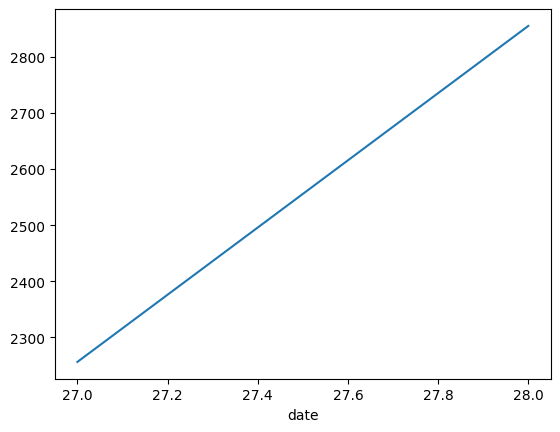

In [41]:
short_df['text'].str.len().groupby(by=short_df.index.day).mean().plot()

<Axes: xlabel='date'>

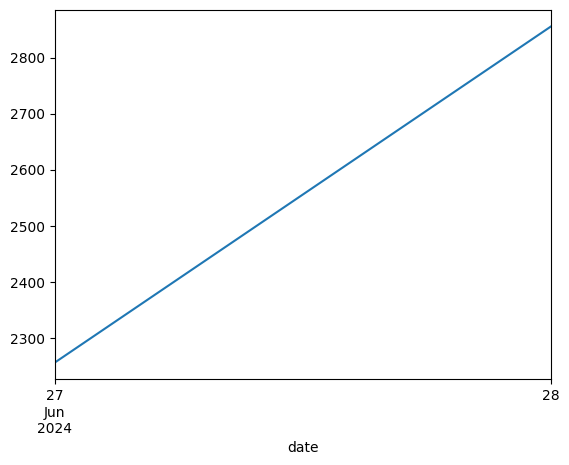

In [42]:
short_df['text'].str.len().resample('D').mean().plot()

<Axes: ylabel='date'>

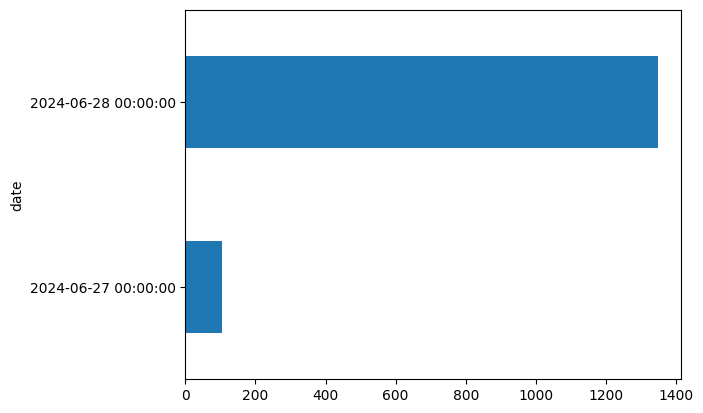

In [43]:
short_df['text'].resample('D').count().plot(kind='barh')

<Axes: xlabel='date'>

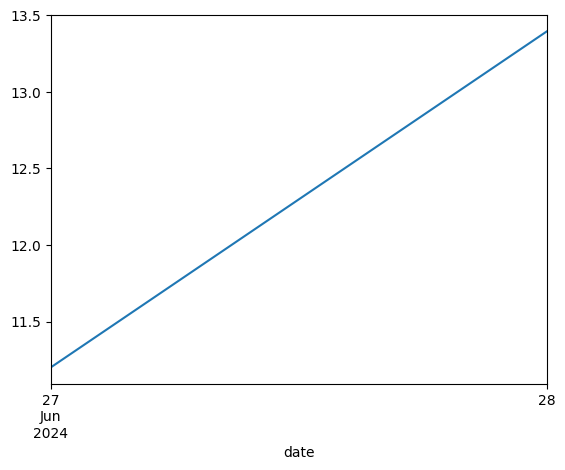

In [44]:
short_df['positive'].resample('D').mean().plot()

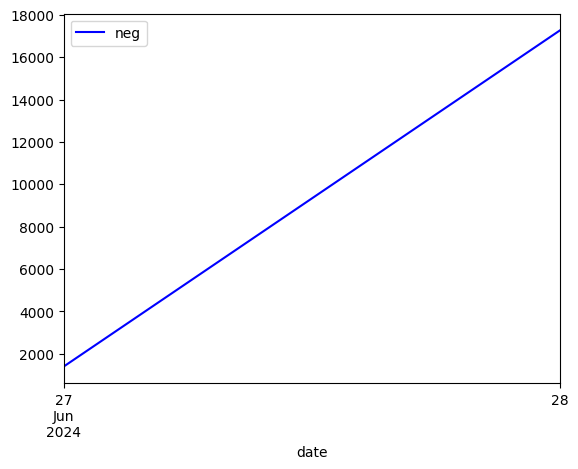

In [45]:
 short_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()


<Axes: xlabel='date'>

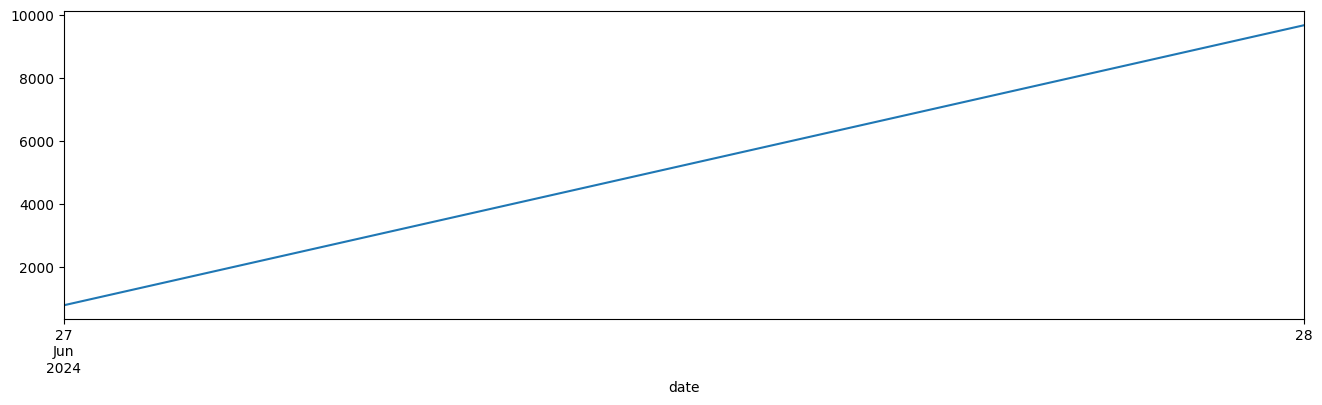

In [46]:
short_df['anger'].resample('D').sum().plot(figsize=(16,4))


<Axes: xlabel='date'>

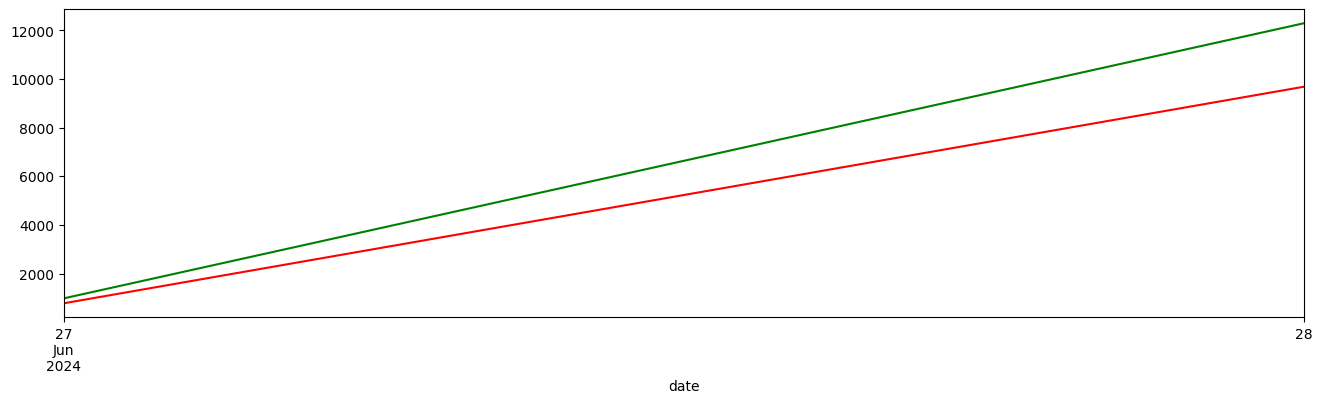

In [47]:
ax = short_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_df['fear'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='date'>

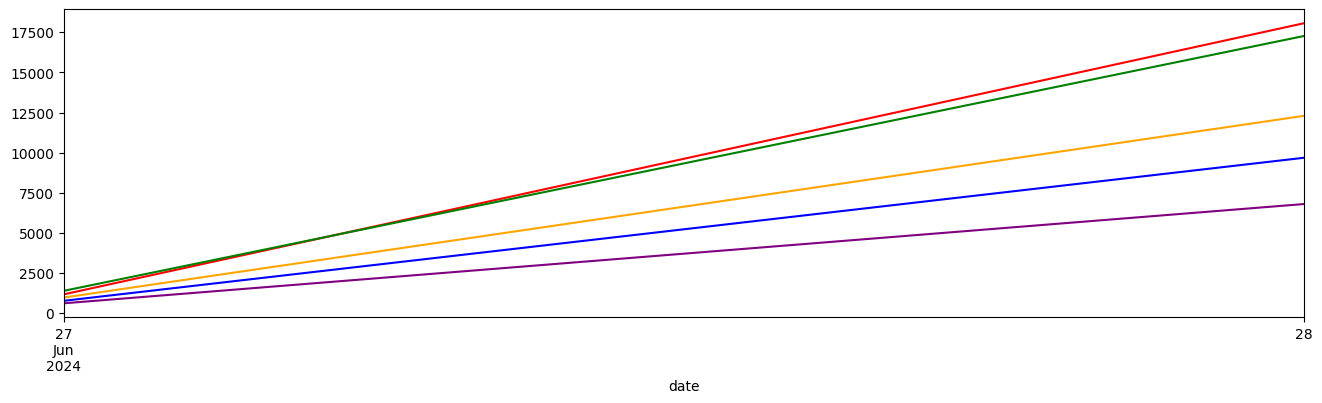

In [48]:

ax = short_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_df['anger'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
short_df['fear'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'orange')
short_df['disgust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'purple')

In [49]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [50]:
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

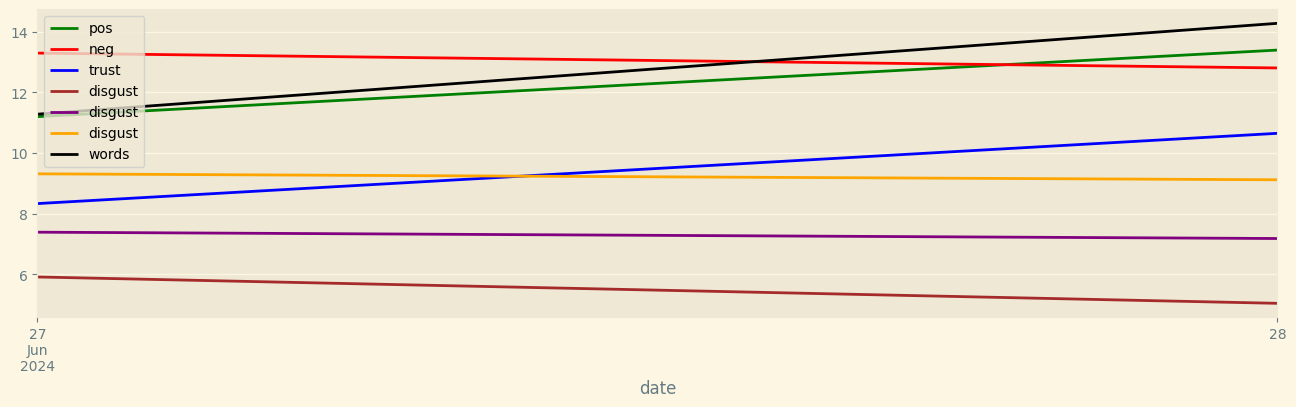

In [51]:
ax = short_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
short_df['anger'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'purple').legend()
short_df['fear'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'orange').legend()
(short_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

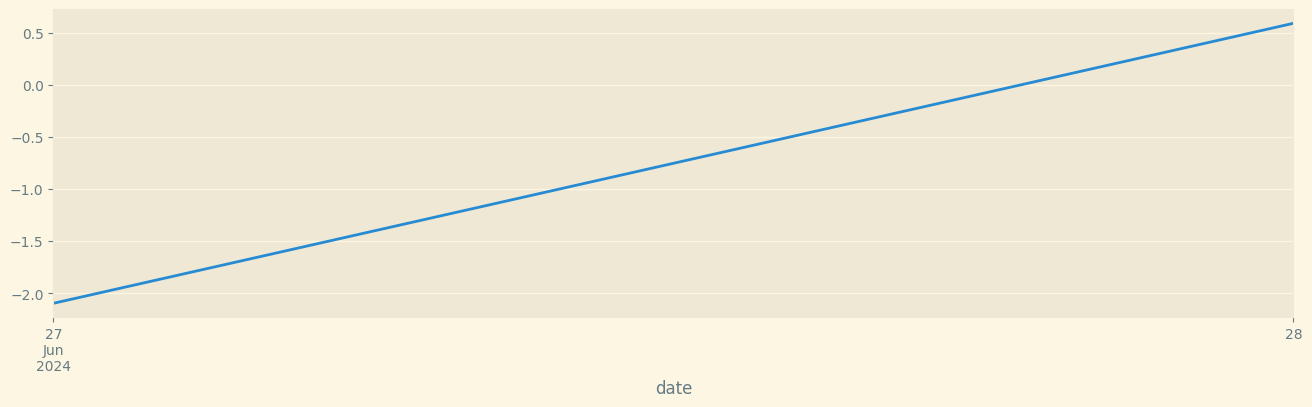

In [52]:

short_df['pos/neg'] = short_df['positive'] - short_df['negative']
short_df['pos/neg'].resample('D').mean().plot(figsize=(16,4))

In [53]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

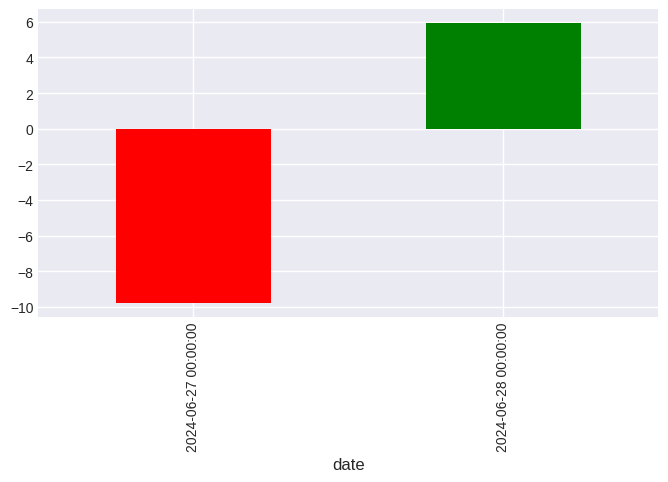

In [54]:
short_df['(-)αρνητικότητα | θετικότητα(+)'] = short_df.positive*100//short_df[['positive','negative']].sum(
        axis=1) - short_df.negative*100//short_df[['positive','negative']].sum(axis=1)

short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [55]:
short_df[(short_df['(-)αρνητικότητα | θετικότητα(+)'] == short_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_df['(-)αρνητικότητα | θετικότητα(+)'] == short_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2024-06-28,78,0,9,-100.0
2024-06-28,153,17,0,100.0
2024-06-28,163,2,0,100.0
2024-06-28,200,2,0,100.0
2024-06-28,378,2,0,100.0
2024-06-28,386,4,0,100.0
2024-06-28,409,3,0,100.0
2024-06-28,569,4,0,100.0
2024-06-28,572,1,0,100.0


In [56]:
full_articles_df.loc[[779 ,589], ['title', 'text']]

,title,text
779,Απόστολος Λύτρας: Άρση απορρήτου των επικοινων...,Εκπνέει σήμερα η προθεσμία για την δυνατότητα ...
589,Καταδικάστηκε 15χρονος για σχέδιο εξτρεμιστική...,Δικαστήριο της Κολωνίας καταδίκασε 15χρονο για...


In [57]:
import spacy


In [58]:
!python -m spacy download el_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.7.0/el_core_news_sm-3.7.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [59]:
nlp = spacy.load('el_core_news_sm')

In [60]:
list(nlp.Defaults.stop_words)[0:20]

['τούς',
 'που',
 'κατά',
 'διαρκώς',
 'ανάμεσα',
 'έτερους',
 'ίδιοι',
 'εκείνου',
 'ετέρου',
 'οποίαν',
 'συχνόν',
 'οπότε',
 'μόνης',
 'ταύτοταύτον',
 'τούτης',
 'ετέρα',
 'επίσης',
 'πρώτο',
 'συχνώς',
 'πιθανόν']

In [61]:


# Ανάκτηση των κειμένων από τις γραμμές 779 και 589
text1 = full_articles_df.loc[779, 'text']
text2 = full_articles_df.loc[589, 'text']



In [62]:
doc = nlp(full_articles_df['text'][1])

In [63]:
for token in doc:
    print(token, token.lemma_)

Ι. Ι.
Παλαμίδης* παλαμίδης*ς

 

Κύριε κύριος
διευθυντά διευθυντά

 

Διαβάζοντας Διαβάζω
όπως όπως
πάντα πάντα
την ο
« «
Κυριακάτικη Κυριακάτικη
Καθημερινή Καθημερινή
» »
έπεσα έπεσα
στο σε ο
άρθρο άρθρο
του ο
κ. κ.
Ανδρέα Ανδρέα
∆ρυμιώτη ∆ρυμιώτη
, ,
του ο
εξαιρετικού εξαιρετικός
συνεργάτη συνεργάτος
σας μου
μηχανικού μηχανικού
, ,
στατιστικολόγου στατιστικολόγου
, ,
δημοσιογράφου δημοσιογράφος
, ,
συμβούλου συμβούλου
επιχειρήσεων επιχείρηση
κ.λπ. κ.λπ.

 

Το ο
άρθρο άρθρο
του μου
( (
φ φ
. .
23/6 23/6
) )
είχε έχω
τίτλο τίτλο
« «

 

Διδάγματα Διδάγματα
από από
μία ένας
επίσκεψη επίσκεψη
στην σε ο
Κύπρο Κύπρος

 

» »
. .
Σ’ σ’
αυτό αυτός
εξυμνεί εξυμνώ
τη ο
σημερινή σημερινός
κατάσταση κατάσταση
στο σε ο
νησί νησί
και και
την εγώ
αντιπαραβάλλει αντιπαραβάλλλω
με με
τη ο
σημερνή σημερνή
κατάσταση κατάσταση
στην σε ο
Ελλάδα Ελλάδα
. .
Θα θα
στενοχωρήσω στενοχωρώ
τον ο
κ. κ.
Δρυμιώτη Δρυμιώτης
αλλά αλλά
δεν δεν
τα εγώ
λέει λέει
καλά καλά
. .
Εχω εχω
επισκεφτεί επισκεφτεί
δύο δύο
φορέ

In [64]:
full_articles_df['text'][1]

'Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπως πάντα την «Κυριακάτικη Καθημερινή» έπεσα στο άρθρο του κ. Ανδρέα ∆ρυμιώτη, του εξαιρετικού συνεργάτη σας μηχανικού, στατιστικολόγου, δημοσιογράφου, συμβούλου επιχειρήσεων κ.λπ.\nΤο άρθρο του (φ. 23/6) είχε τίτλο «\nΔιδάγματα από μία επίσκεψη στην Κύπρο\n». Σ’ αυτό εξυμνεί τη σημερινή κατάσταση στο νησί και την αντιπαραβάλλει με τη σημερνή κατάσταση στην Ελλάδα. Θα στενοχωρήσω τον κ. Δρυμιώτη αλλά δεν τα λέει καλά. Εχω επισκεφτεί δύο φορές την Κύπρο σαν τουρίστας κι έχω διαφορετική άποψη για τους Κυπρίους.\nΓράφει για το λογισμικό που είχε ο ταξιτζής που ειδοποιεί για κάμερες. Μα κ. συνάδελφε, αυτό απαγορεύεται στην Ελλάδα. Επίσης εδώ απαγορεύεται η δημοσίευση προσώπου εκτός αν υπάρχει διαταγή εισαγγελέως. Εχετε πολλούς φίλους εδώ. Ρωτήστε τους.\nΤα καταστήματα εδώ είναι κλειστά τις Κυριακές και επισήμους αργίες όχι για θρησκευτικούς λόγους αλλά για να ξεκουράζονται στοιχειωδώς οι ιδιωτικοί υπάλληλοι, ενώ οι δημόσιοι υπάλληλοι κουράζοντα

In [65]:
' '.join(token.lemma_ for token in doc)

'Ι. παλαμίδης*ς \n κύριος διευθυντά \n Διαβάζω όπως πάντα ο « Κυριακάτικη Καθημερινή » έπεσα σε ο άρθρο ο κ. Ανδρέα ∆ρυμιώτη , ο εξαιρετικός συνεργάτος μου μηχανικού , στατιστικολόγου , δημοσιογράφος , συμβούλου επιχείρηση κ.λπ. \n ο άρθρο μου ( φ . 23/6 ) έχω τίτλο « \n Διδάγματα από ένας επίσκεψη σε ο Κύπρος \n » . σ’ αυτός εξυμνώ ο σημερινός κατάσταση σε ο νησί και εγώ αντιπαραβάλλλω με ο σημερνή κατάσταση σε ο Ελλάδα . θα στενοχωρώ ο κ. Δρυμιώτης αλλά δεν εγώ λέει καλά . εχω επισκεφτεί δύο φορά ο Κύπρος σαν τουρίστα και έχω διαφορετικός άποψη για ο Κυπρίος . \n Γράφει για ο λογισμικός που έχω ο ταξιτζής που ειδοποιώ για κάμερα . μα κ. συνάδελφε , αυτός απαγορεύω σε ο Ελλάδα . επίσης εδώ απαγορεύεται ο δημοσίευση προσώπου εκτός αν υπάρχω διαταγή εισαγγελέως . Εχετε πολύς φίλος εδώ . Ρωτήστε μου . \n ο καταστήματα εδώ είμαι κλειστάς ο Κυριακές και επισήμος αργία όχι για θρησκευτικός λόγος αλλά για να ξεκουράζω στοιχειωδώς ο ιδιωτικός υπάλληλος , ενώ ο δημόσιος υπάλληλος κουράζονται ό

In [66]:
text1

'Εκπνέει σήμερα η προθεσμία για την δυνατότητα προσφυγής που έχει ο ποινικολόγος, κατά του εντάλματος προσωρινής κράτησης με το οποίο έχει\xa0προφυλακιστεί.\nΝα αρθεί το το τηλεφωνικό απόρρητο του\nΑπόστολου Λύτρα\n, για το διάστημα από τις 16 εώς τις 19 Ιουλίου, δηλαδη από την ημέρα που εκείνος την ξυλοκόπησε, μέχρι και την στιγμή που συνελήφθη, ζητεί με υπόμνημα που κατέθεσε προς την ανακρίτρια η σύζυγος του.\nΤο υπόμηνα κατέθεσε ο συνήγορος της 37χρονης, Θέμης Σοφός.\nΣύμφωνα με πληροφορίες, στο υπόμνημά της, η 37χρονη υποστηρίζει πως ο κ. Λύτρας την εξέθεσε σε σοβαρότατο κίνδυνο ζωής, επειδή μετά τον ξυλοδαρμός της, την μετέφερε πρώτα στην κατοικία τους στα Βόρεια Προάστια και στη συνέχεια στην ιδιωτική κλινική στο κέντρο της Αθήνας.\nΕντωμεταξύ, εκπνέει σήμερα η π\nροθεσμία για την δυνατότητα προσφυγής που έχει ο ποινικολόγος, κατά του εντάλματος προσωρινής κράτησης με το οποίο έχει προφυλακιστεί.\nΨάλτης και ιδιοκτήτης λούνα παρκ διακινούσαν ναρκωτικά (εικόνες)\nΚατερίνη: Τραγικό

In [67]:
text2

'Δικαστήριο της Κολωνίας καταδίκασε 15χρονο για συνωμοσία με σκοπό δολοφονία και διατάραξη της δημόσιας ειρήνης με απειλές εγκλημάτων, μετά από τις συνεδριάσεις κεκλεισμένων των θυρών βάσει του νόμου περί ανηλίκων, μετέδωσε το γερμανικό πρακτορείο ειδήσεων dpa.\nΟ έφηβος, το όνομα του οποίου δεν δόθηκε στην δημοσιότητα, συνελήφθη τον περασμένο Νοέμβριο. Το δικαστήριο διαπίστωσε ότι ριζοσπαστικοποιήθηκε το περασμένο φθινόπωρο και, μέσα σε λίγες εβδομάδες, είχε συμφωνήσει με έναν 16χρονο γνωστό του να επιτεθεί σε χριστουγεννιάτικη αγορά στο Λεβερκούζεν.\nΤο σχέδιο προέβλεπε ότι ο κατηγορούμενος θα οδηγούσε ένα νοικιασμένο φορτηγό στην αγορά και θα σκότωνε όσο το δυνατόν περισσότερους πολίτες, ενώ ο συνεργός του θα βιντεοσκοπούσε την επίθεση. Σύμφωνα με την ετυμηγορία, ο κατηγορούμενος ανήρτησε βίντεο σε ομάδα συνομιλιών, ανακοινώνοντας μια επίθεση κατά «άπιστων», ενώ στο φόντο φαινόταν σύμβολο του Ισλαμικού κράτους.\nΟ 15χρονος φέρεται να παραδέχθηκε τις κατηγορίες που τον βαρύνουν. Ο φε

In [68]:
full_doc = nlp(text1)

In [69]:
clear_text1 = ' '.join(token.lemma_ for token in full_doc)

In [70]:
clear_text1[200:400]

'τρα \n , για ο διάστημα από ο 16 εώς ο 19 Ιούλιος , δηλαδη από ο ημέρα που εκείνος εγώ ξυλοκόπησε , μέχρι και ο στιγμή που συνελήφθη , ζητεί με υπόμνημα που καταθέτω προς ο ανακρίτριο ο σύζυγος μου . \n'

In [72]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

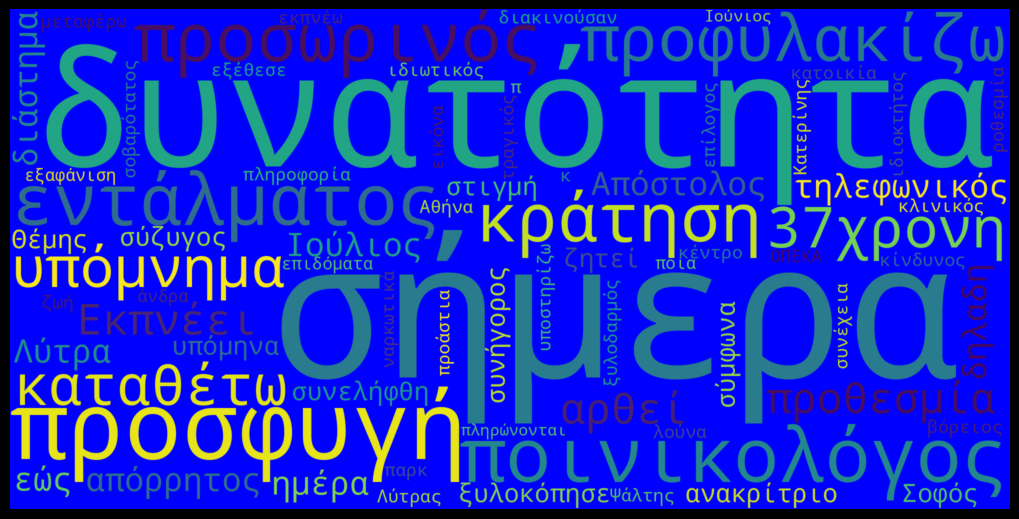

In [73]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'blue'
 ).generate(clear_text1)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [74]:
full_doc = nlp(text2)

In [75]:
clear_text2 = ' '.join(token.lemma_ for token in full_doc)

In [76]:
clear_text2[200:400]

' , μετέδωσε ο γερμανικός πρακτορείο ειδήσεων dpa . \n ο έφηβος , ο όνομα ο οποίος δεν δόθηκε σε ο δημοσιότητα , συνελήφθη ο περασμένος Νοέμβριος . ο δικαστήριο διαπίστωσε ότι ριζοσπαστικοποιήθηκε ο περ'

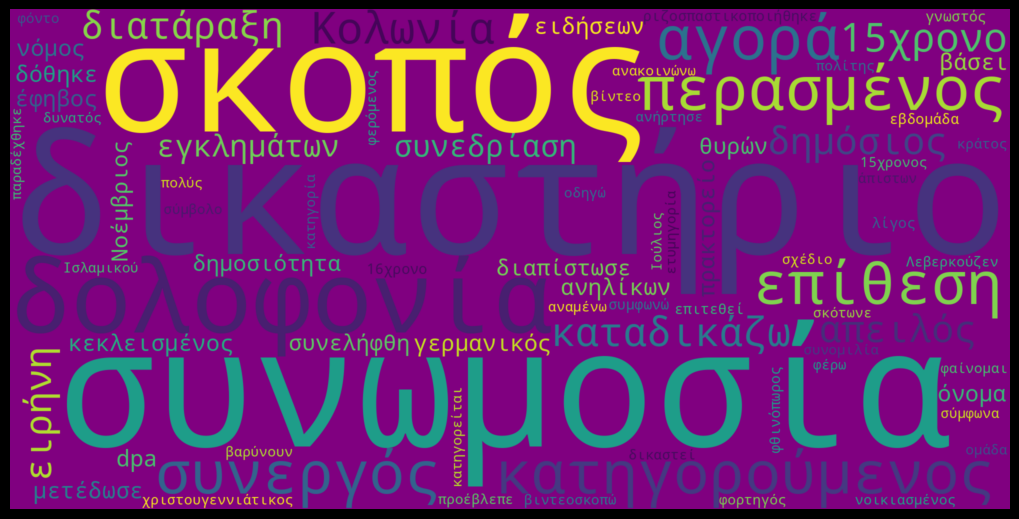

In [77]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'purple'
 ).generate(clear_text2)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<Axes: xlabel='date'>

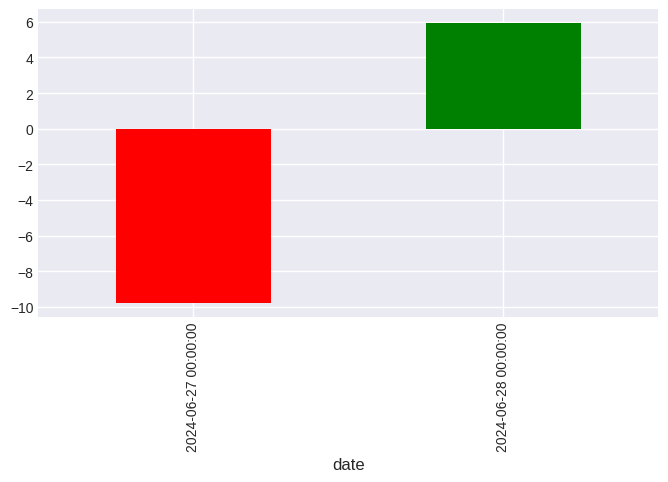

In [78]:
short_df['(-)αρνητικότητα | θετικότητα(+)'] = short_df.positive*100//short_df[['positive','negative']].sum(
        axis=1) - short_df.negative*100//short_df[['positive','negative']].sum(axis=1)

short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))